<font color='blue'> 

# Sean Stroud 

## 19 May 2020

# Installation

1) install pysynphot (https://pysynphot.readthedocs.io/en/latest/index.html)
 - if you use pip just type in a terminal: pip install pysynphot
- note that to use pysynphot correctly you may have to upgrade numpy to the latest version: pip install numpy --upgrade
  (This will avoid to get the "No module named _multiarray_umath" error)

2) untar the tar file (https://obswww.unige.ch/~schaerer/Master/spectral_diagnostics/synphot12_popstar_cdbs.tar.gz) in your project folder. It contains the necessary data (spectral library) files.
To make the library files accessible from everywhere in the code, create a dynamic link to PYSYN_CDBS.
- type in a terminal: export PYSYN_CDBS=/your_path/synphot12_popstar_cdbs/cdbs/ (e.g., for me $$ export PYSYN_CDBS=/Users/mic/Teaching/synphot12_popstar_cdbs/cdbs/)
- In this way, from any program you can access the right path with os.environ['PYSYN_CDBS'] (see next step)

3) ..you should be ready to use pysynphot now, and to start with "1 Getting started".

In [1]:
#!pip install pysynphot

In [2]:
# export the path where you untarred files, e.g., 
# export PYSYN_CDBS=/Users/mic/Teaching/synphot12_popstar_cdbs/cdbs/
PYSYN_CDBS = 'synphot12_popstar_cdbs/cdbs/'

In [3]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import pysynphot as S

# Functions

In [4]:
# ------------------------------------------------ #
# Get D(4000) function     ----------------------- #

def get_D4000(pysynphot_spec): 
    # ...your code
    ind_upper = np.where((pysynphot_spec.wave >= 4000) & (pysynphot_spec.wave <= 4100))
    ind_lower = np.where((pysynphot_spec.wave >= 3850) & (pysynphot_spec.wave <= 3950))
    F_upper = np.mean(pysynphot_spec.flux[ind_upper])
    F_lower = np.mean(pysynphot_spec.flux[ind_lower])
    D4000 = F_upper/F_lower
    return D4000

# get_D4000 takes any spectrum in pysynphot format and gives you D4000

In [5]:
# ------------------------------------------------ #
# BalmerBreak function     ----------------------- #
# (same as D(4000) but using a lower wavelength on the blue side ...)
def get_bb(pysynphot_spec): 
     # ...your code 
    ind_upper = np.where((pysynphot_spec.wave >= 4000) & (pysynphot_spec.wave <= 4100))
    ind_lower = np.where((pysynphot_spec.wave >= 3500) & (pysynphot_spec.wave <= 3600))
    F_upper = np.mean(pysynphot_spec.flux[ind_upper])
    F_lower = np.mean(pysynphot_spec.flux[ind_lower])
    BB = F_upper/F_lower
    return BB

In [6]:
# ------------------------------------------------ #
# read spectrum in pysynphot format   ------------ #

def read_template(template):
    
    spectrum = S.FileSpectrum(template)
    spectrum.convert('angstrom') # put wavelenghts in angstrom
    spectrum.convert('flam') # put flux in ergs−1cm−2\AA−1 # check https://pysynphot.readthedocs.io/en/latest/units.html
    
    return spectrum

# Pickles library - "D4000 vs stellar type" analysis

In [7]:
# ------------------------------------------------ #
# Pickles Library -------------------------------- #
# initialize 

# change filename to switch directory (e.g., 'dat_uvi', dat_uvk')
# - the 'dat_uvi' spectra cover 1150-10620 Angstrom
# - the 'dat_uvk' spectra cover 1150-25000 Angstrom
filename = PYSYN_CDBS + 'grid/' + 'pickles/' + 'dat_uvi/' + 'pickles.fits'
filename2 = PYSYN_CDBS + 'grid/' + 'pickles/' + 'dat_uvk/' + 'pickles_uk.fits'
Pickles_Library = pyfits.open(filename)[1].data # ['FILENAME']  / ['SPTYPE']
Pickles_Library2 = pyfits.open(filename2)[1].data # ['FILENAME']  / ['SPTYPE']
#print(Pickles_Library)

In [8]:
# ------------------------------------------------ #
# D4000 vs stellar type -------------------------- #
# ..... for all spectra available, not in order of spectral sequence #

stellar_types = Pickles_Library['SPTYPE']
D4000 = np.zeros((len(stellar_types))) * np.nan

for i in range(0, len(stellar_types)):
    filename3 = PYSYN_CDBS + 'grid/pickles/dat_uvk/'+Pickles_Library2['FILENAME'][i]+'.fits'
    D4000[i] = get_D4000(read_template(filename3))
    #print('type of stars:', stellar_types[i], '   D4000:', D4000[i])

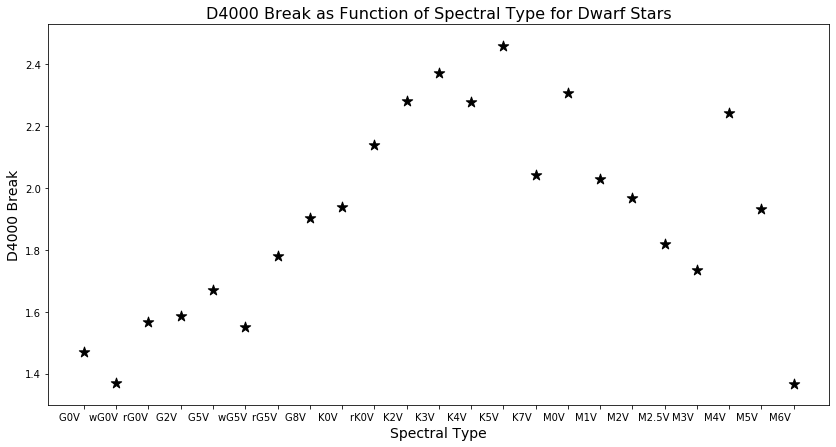

In [9]:
#Plot D4000 as function of spectral type for Dwarf stars

ind_dwarf = np.where(((stellar_types.find('M') >=0) |
                      (stellar_types.find('L') >=0) |
                      (stellar_types.find('K') >=0) |
                      (stellar_types.find('G') >=0)) &
                      (stellar_types.find('V') >=0) &
                      (stellar_types.find('I') <0))[0]

plt.figure(figsize=(14,7))
plt.scatter(stellar_types[ind_dwarf], D4000[ind_dwarf], c='k', marker='*', s=120)
plt.title('D4000 Break as Function of Spectral Type for Dwarf Stars',fontsize=16)
plt.xlabel('Spectral Type',fontsize=14)
plt.ylabel('D4000 Break',fontsize=14)
plt.show()

<font color='blue'> 
The strength of the D4000 break appears to peak for K type stars, with the classes on both sides of K having lower D4000 strength on average.

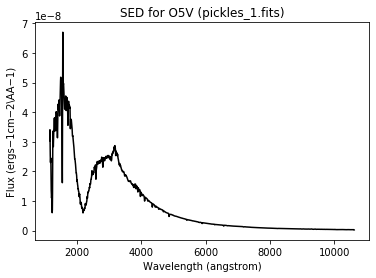

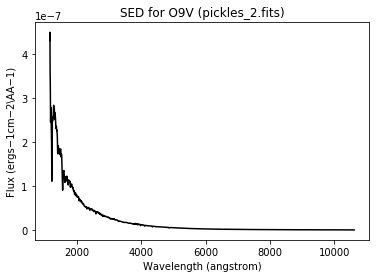

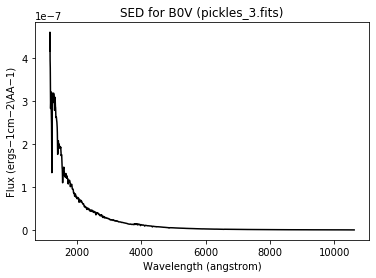

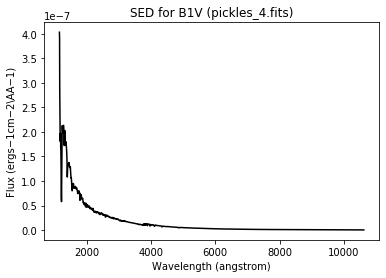

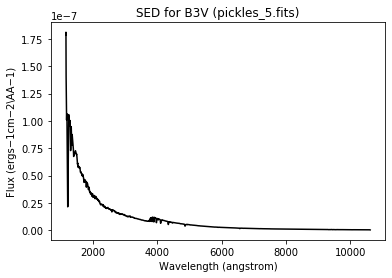

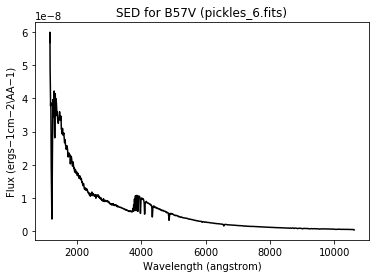

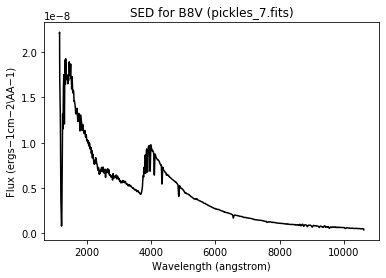

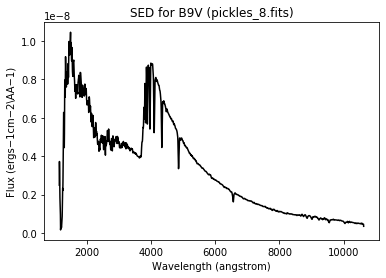

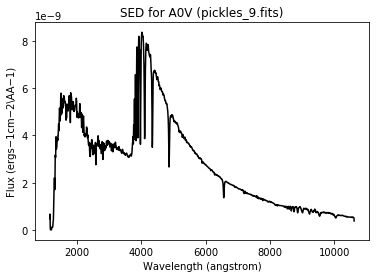

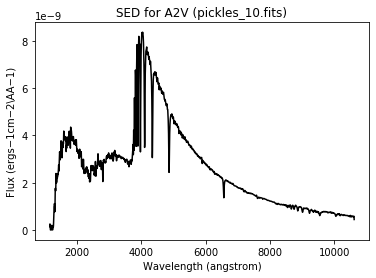

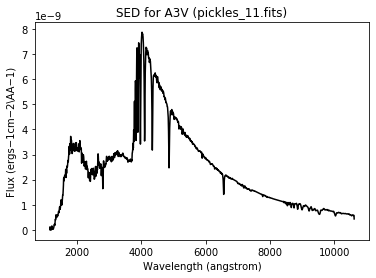

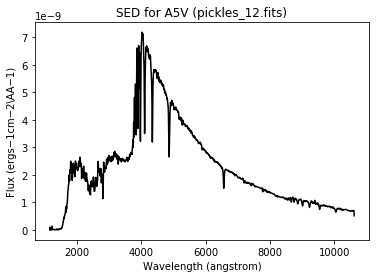

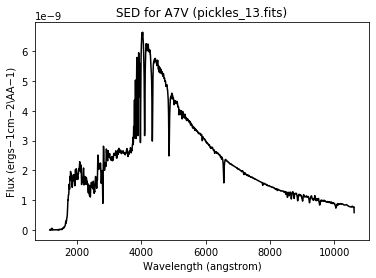

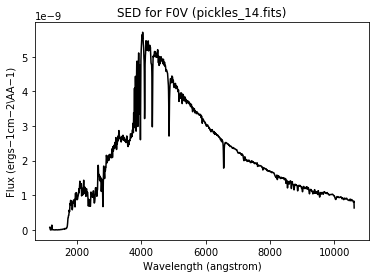

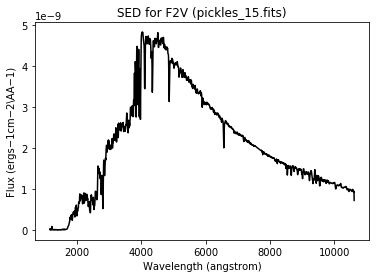

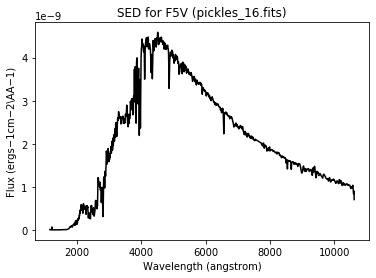

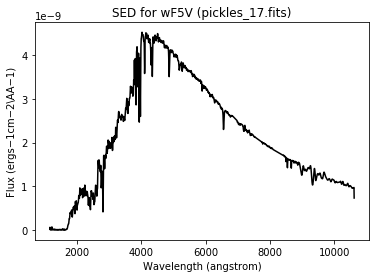

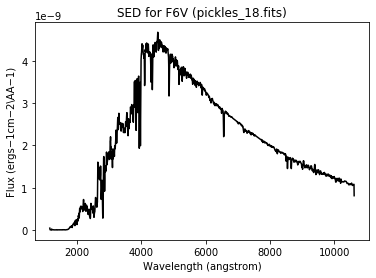

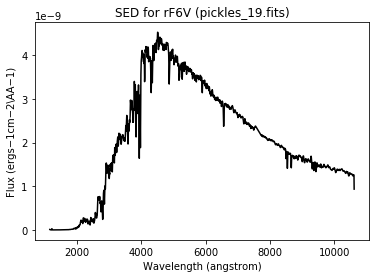

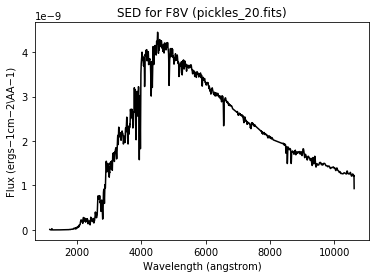

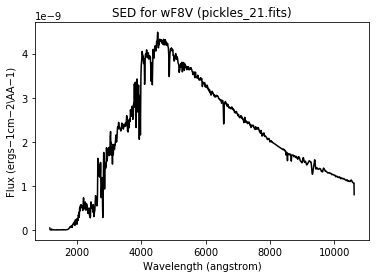

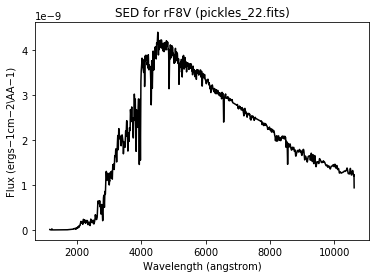

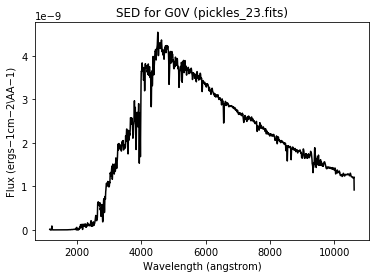

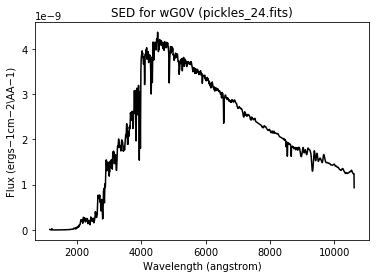

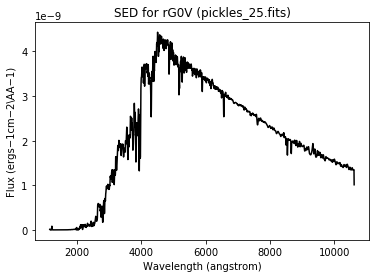

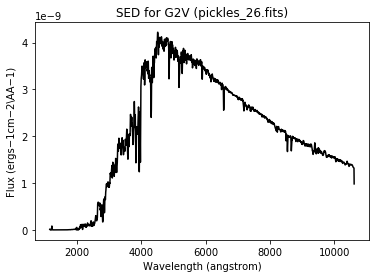

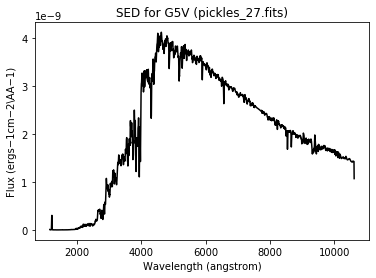

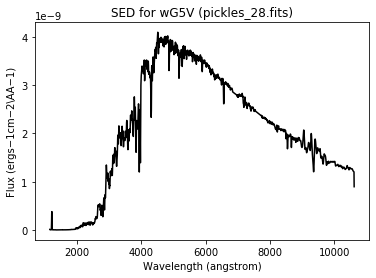

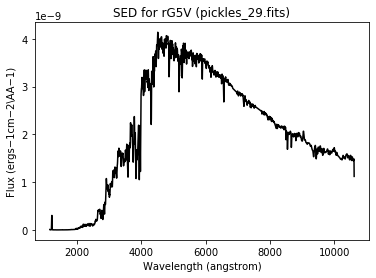

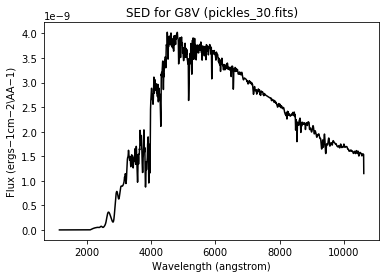

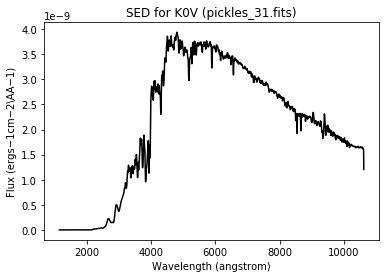

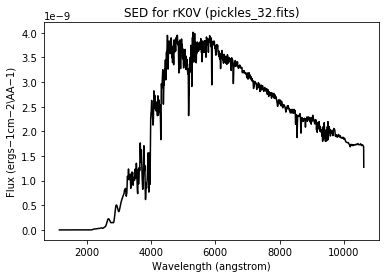

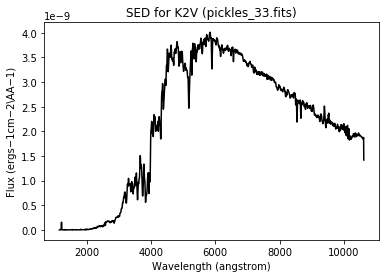

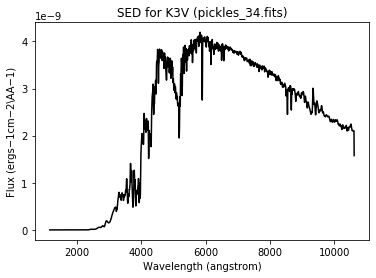

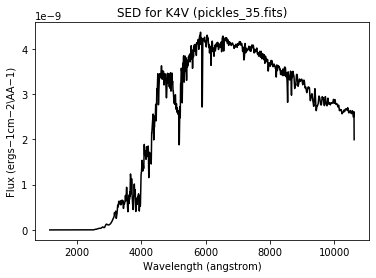

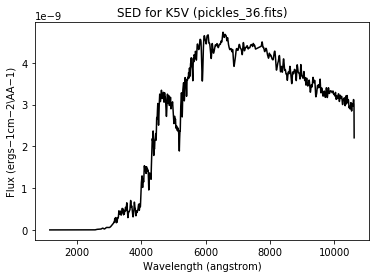

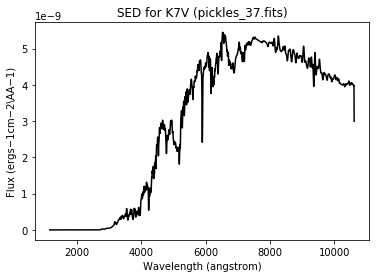

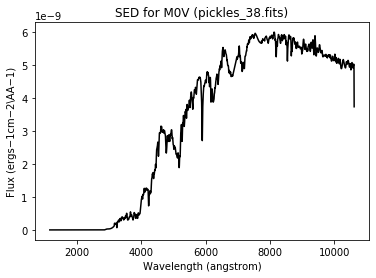

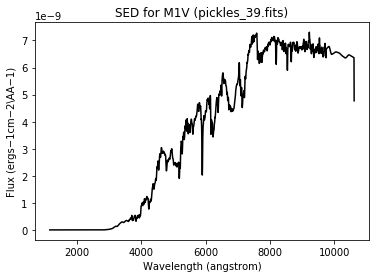

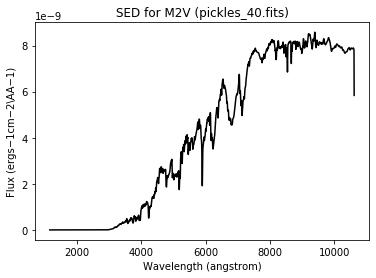

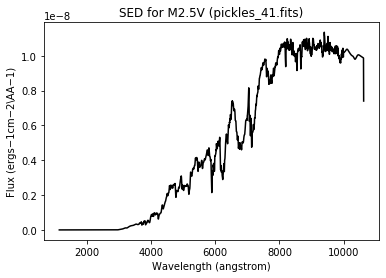

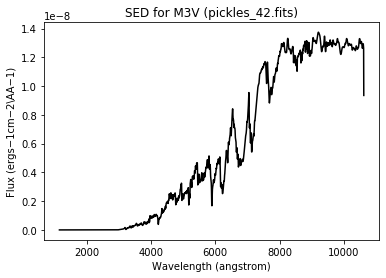

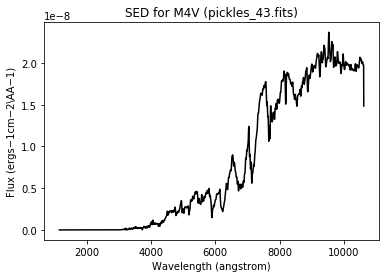

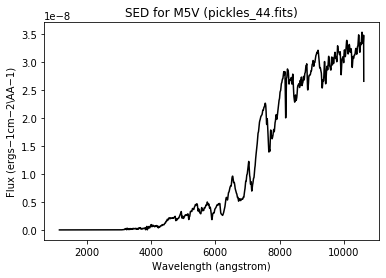

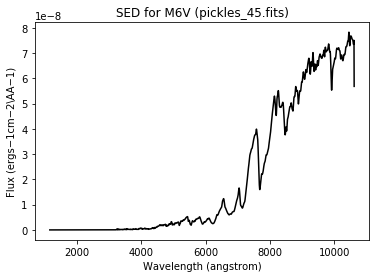

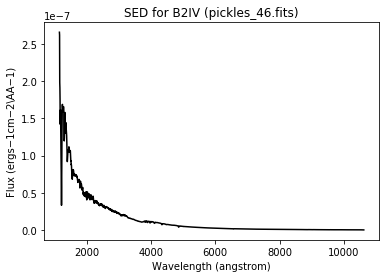

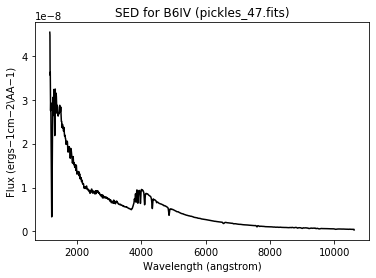

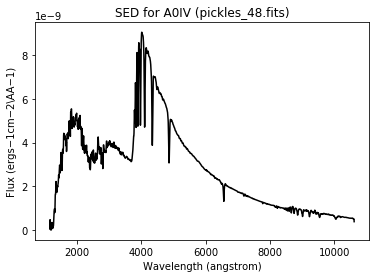

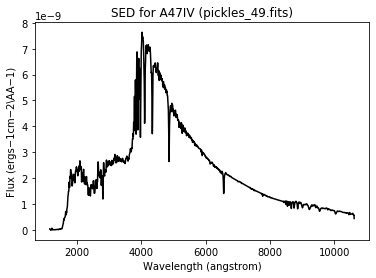

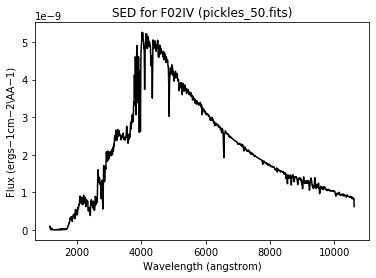

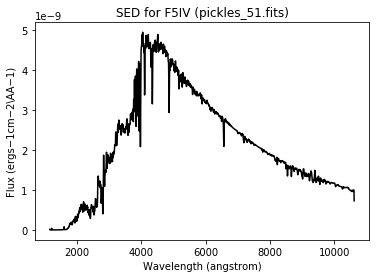

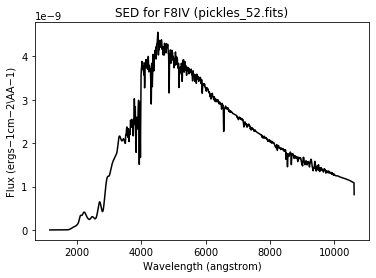

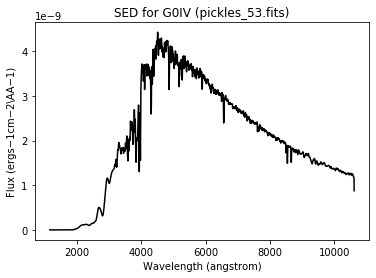

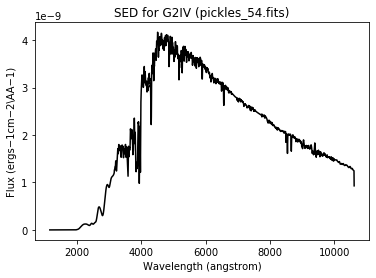

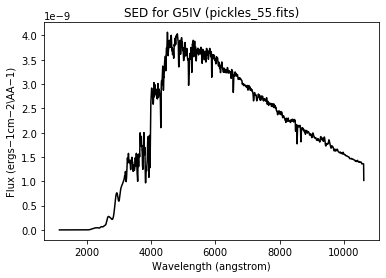

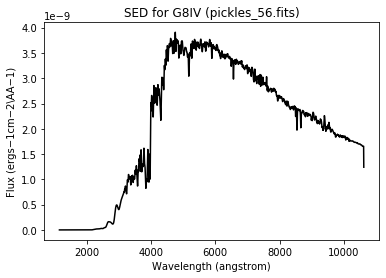

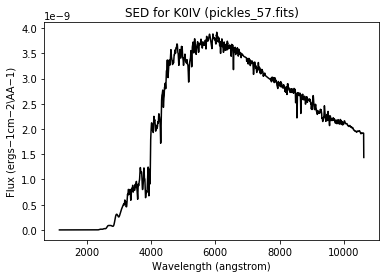

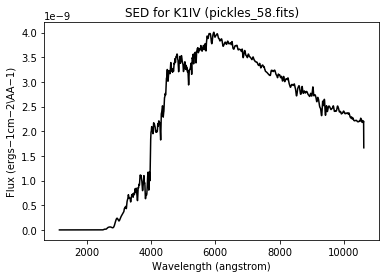

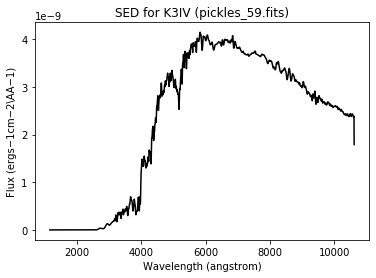

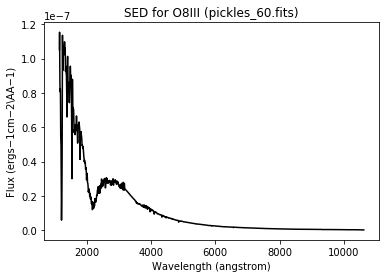

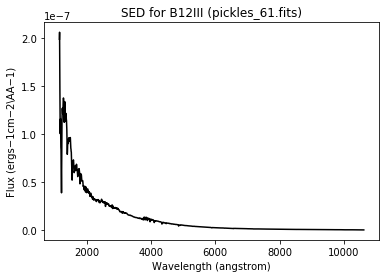

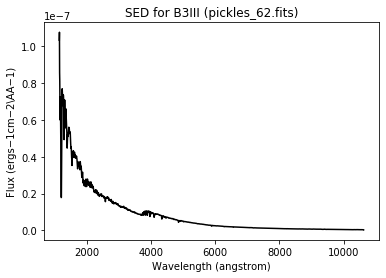

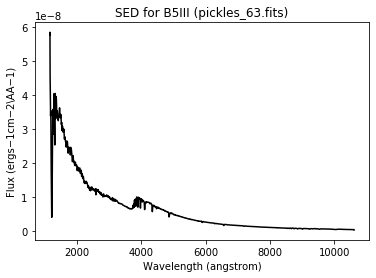

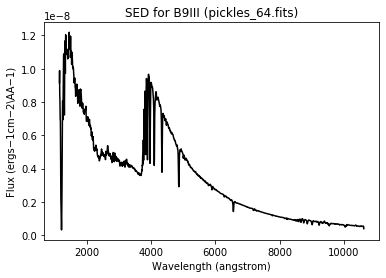

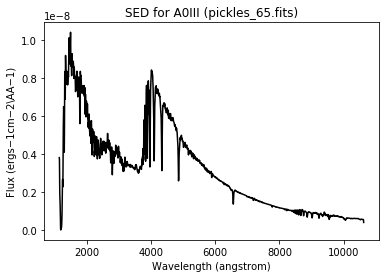

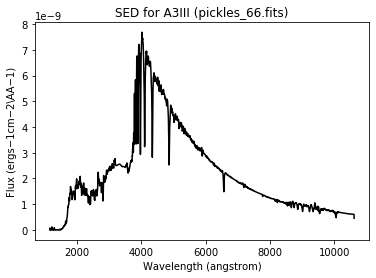

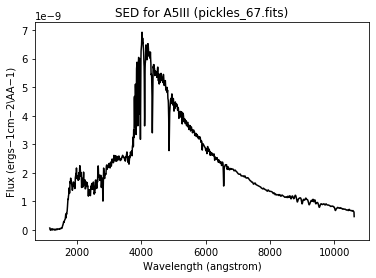

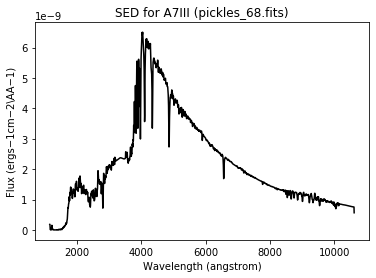

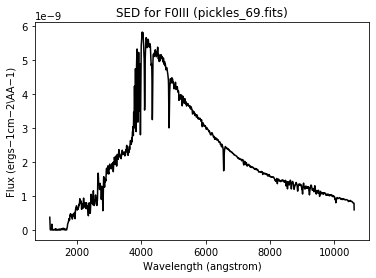

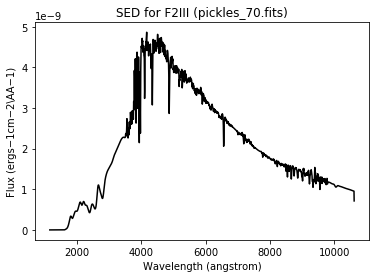

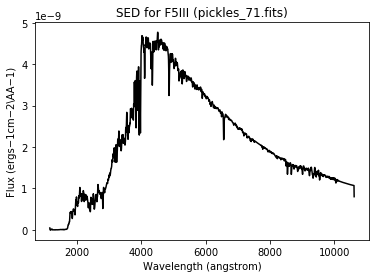

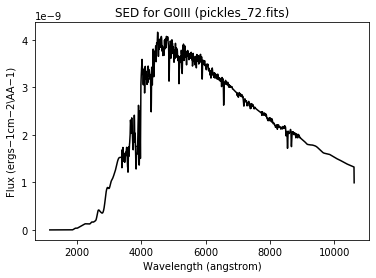

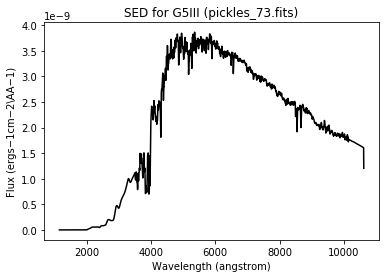

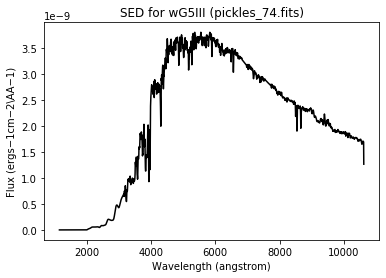

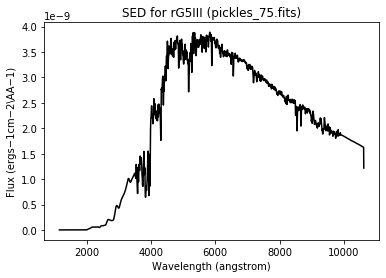

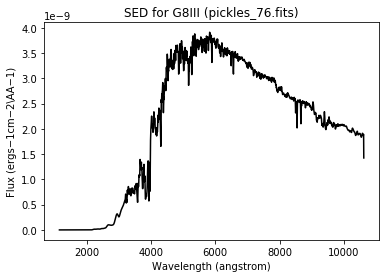

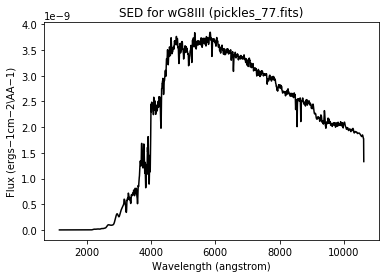

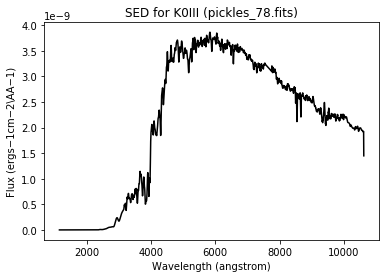

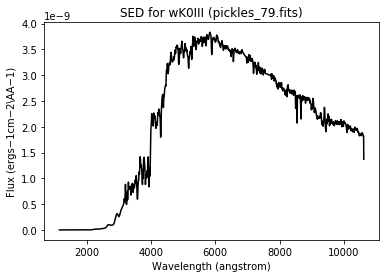

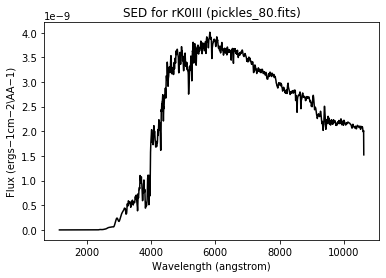

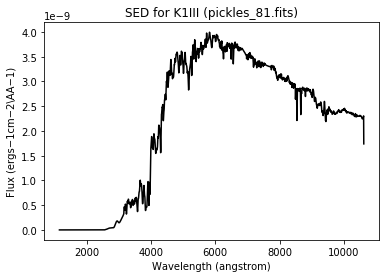

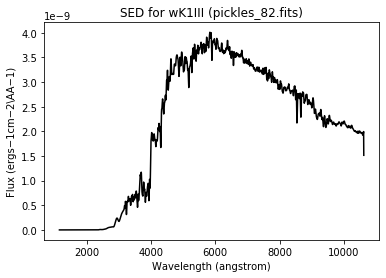

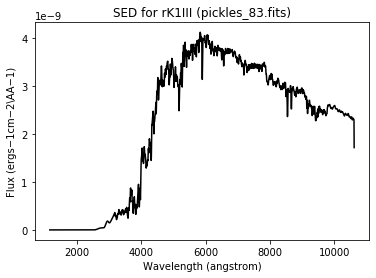

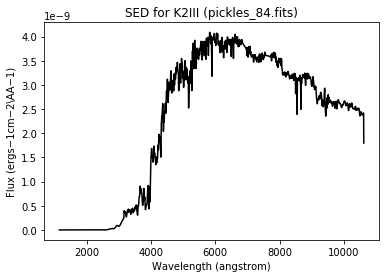

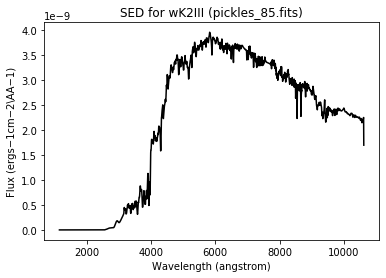

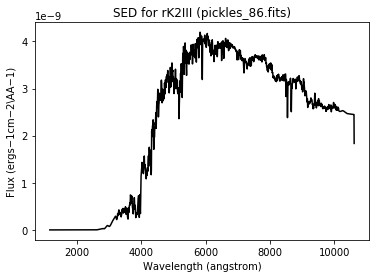

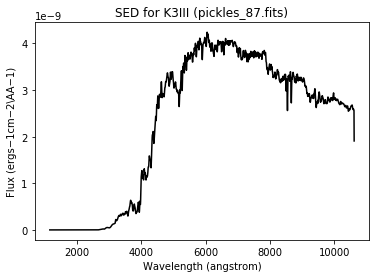

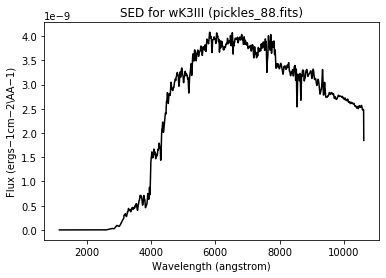

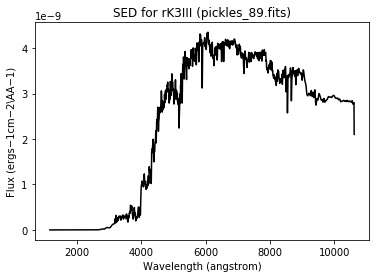

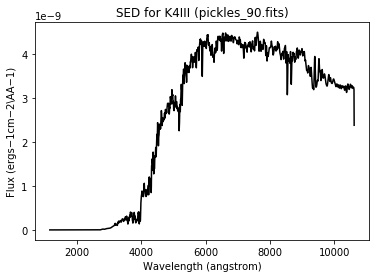

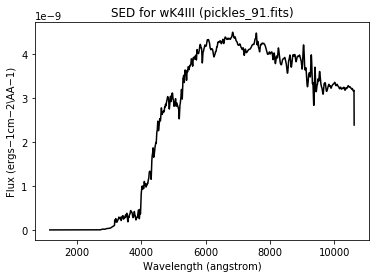

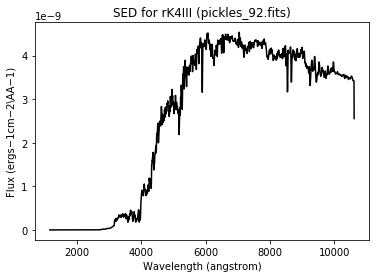

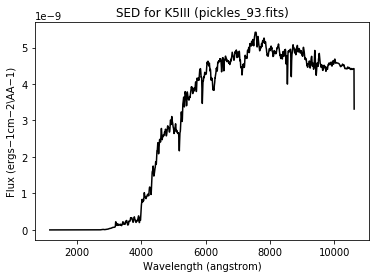

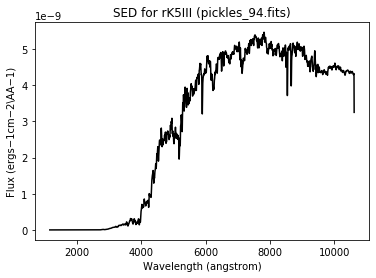

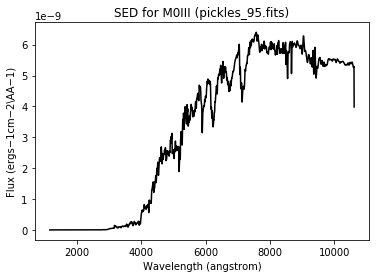

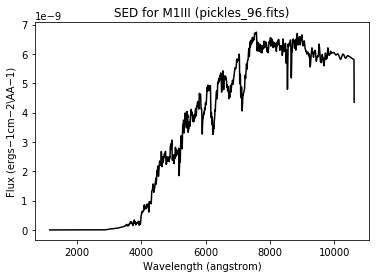

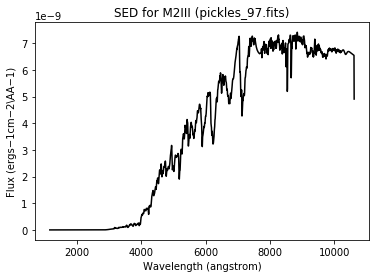

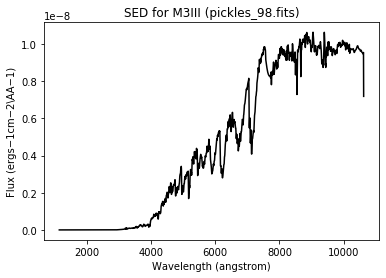

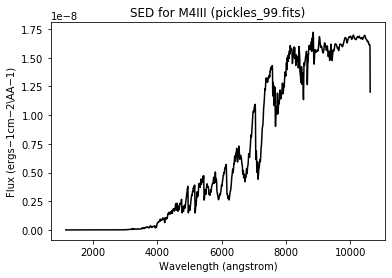

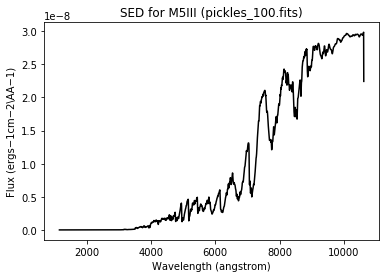

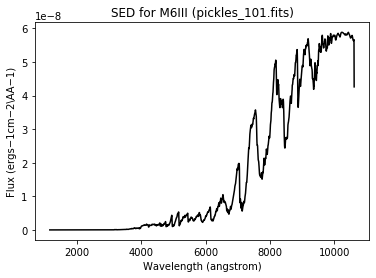

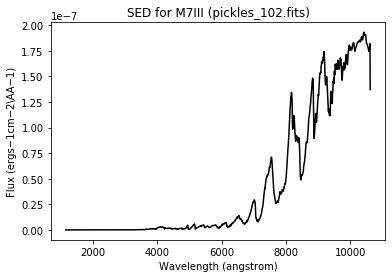

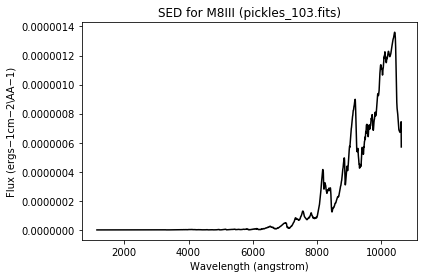

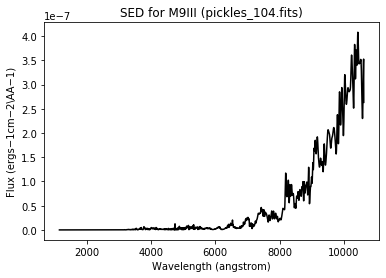

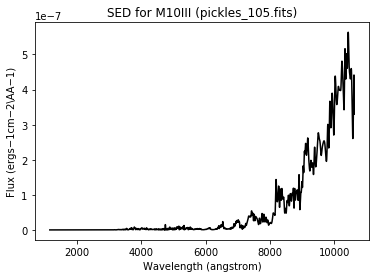

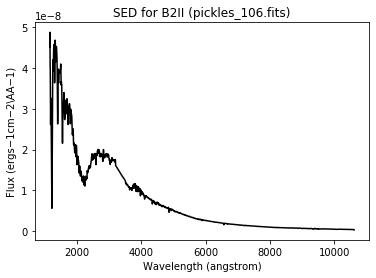

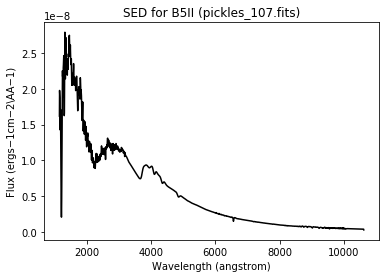

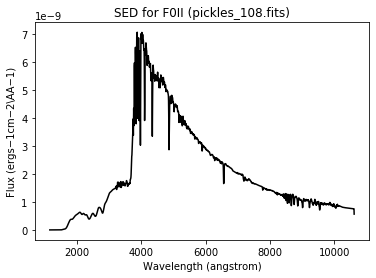

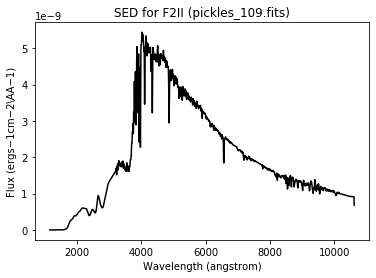

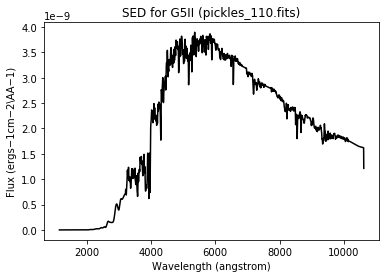

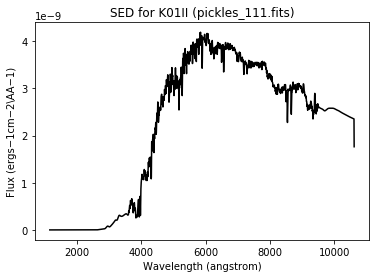

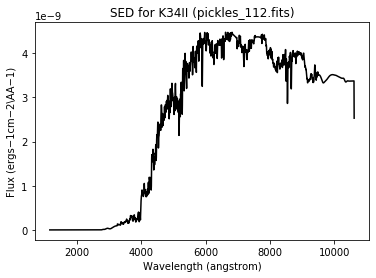

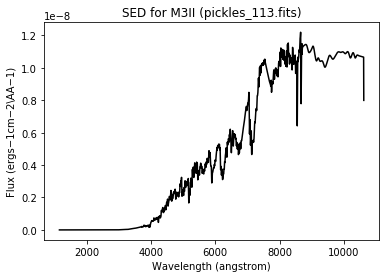

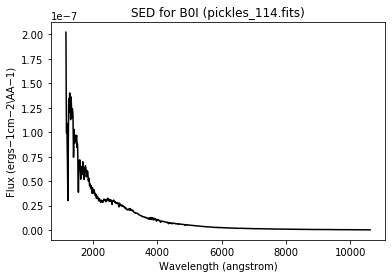

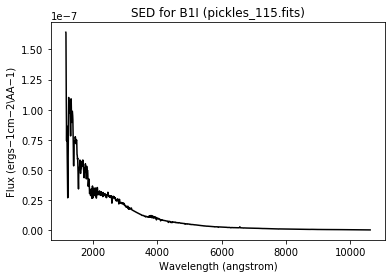

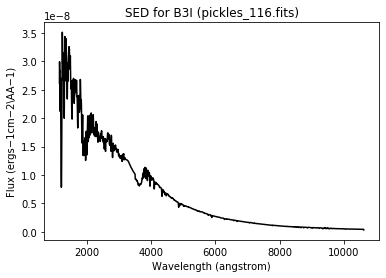

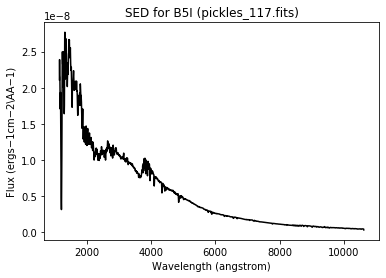

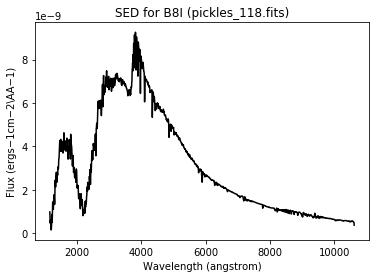

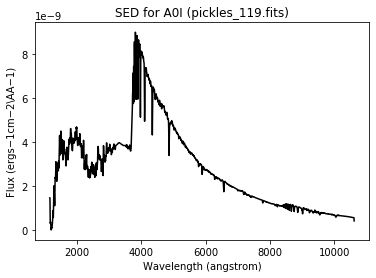

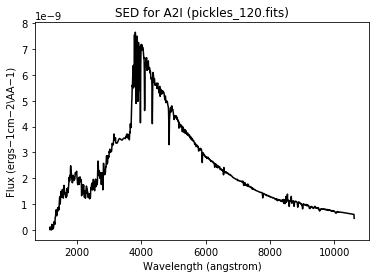

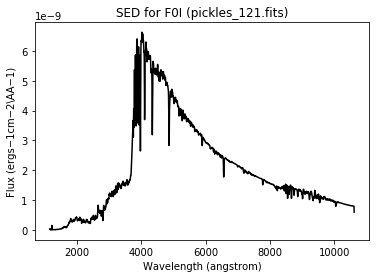

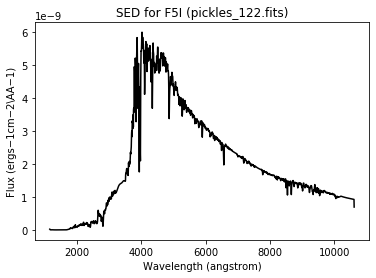

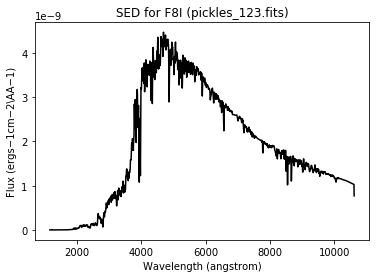

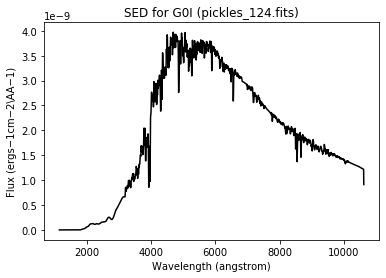

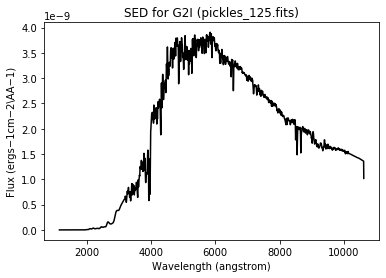

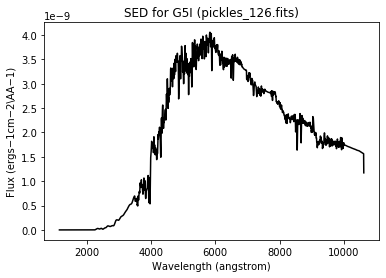

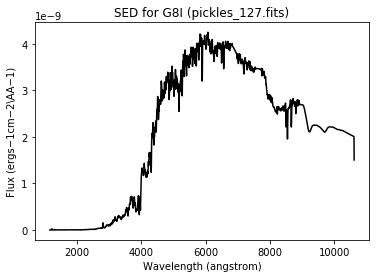

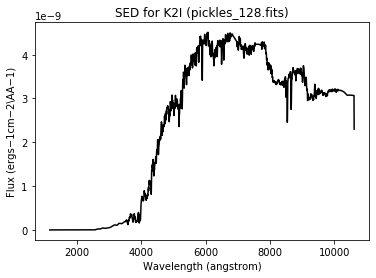

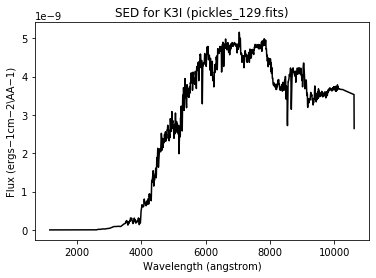

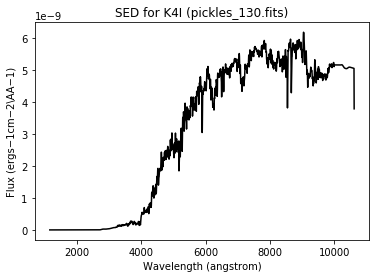

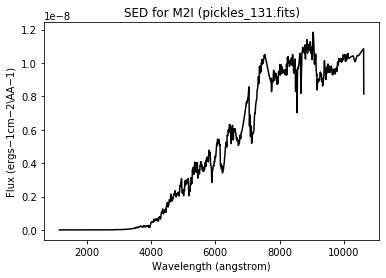

In [10]:
#SEDs for dat_uvi
for i in range(0, len(stellar_types)):
    filename = Pickles_Library['FILENAME'][i]
    filepath = PYSYN_CDBS + 'grid/pickles/dat_uvi/'+str(filename)+'.fits'
    spectype = Pickles_Library['SPTYPE'][i]
    plt.plot(read_template(filepath).wave, read_template(filepath).flux, c='k')
    plt.title('SED for '+str(spectype)+' ('+str(filename)+'.fits)')
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux (ergs−1cm−2\AA−1)')
    #plt.savefig('SED_'+str(filename)+'.png', bbox_inches='tight', dpi=150)
    plt.show()

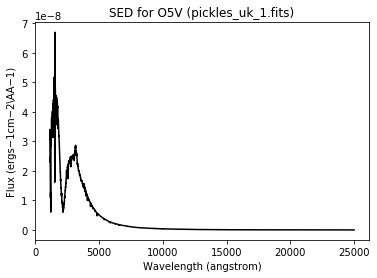

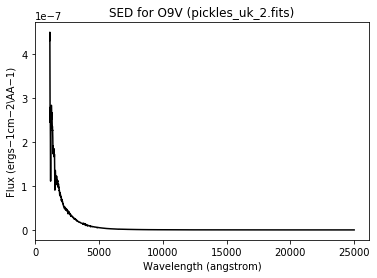

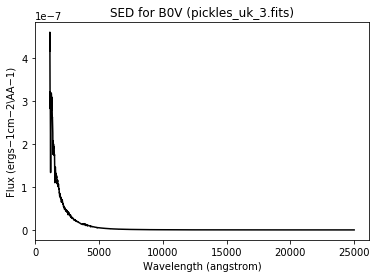

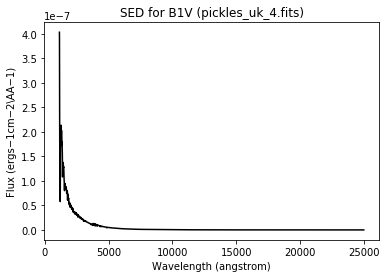

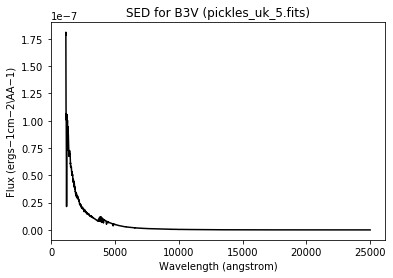

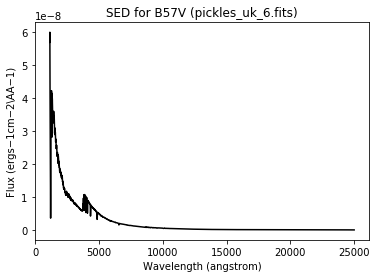

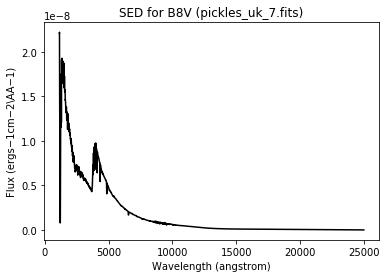

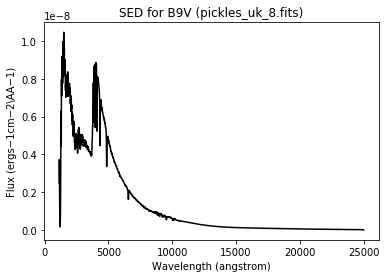

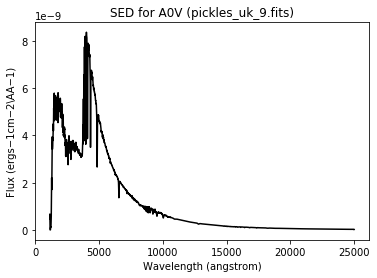

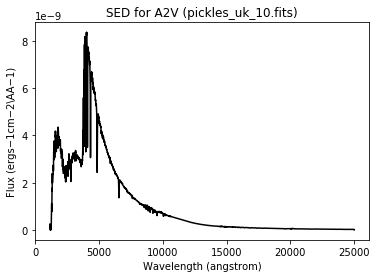

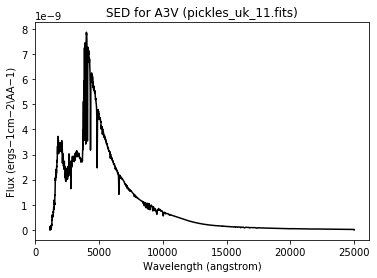

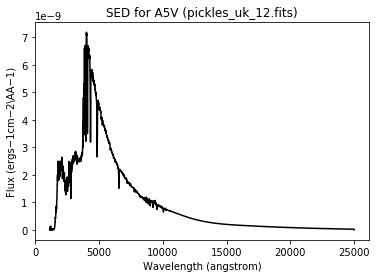

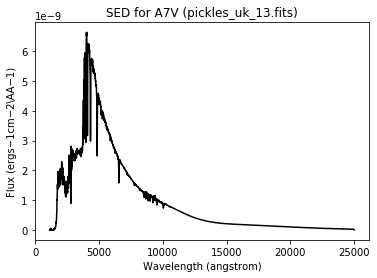

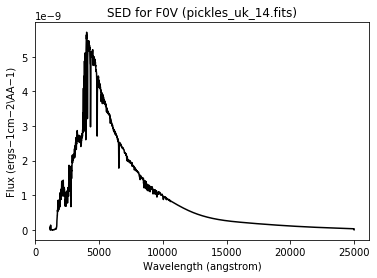

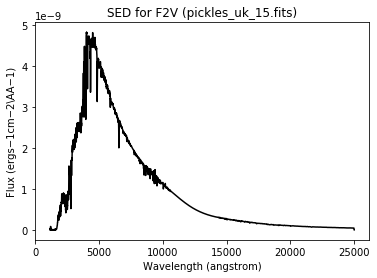

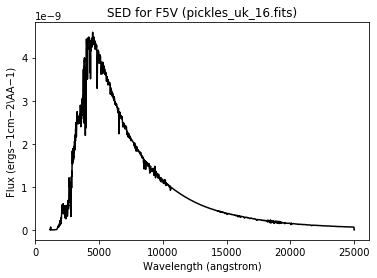

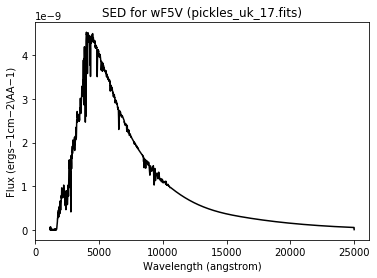

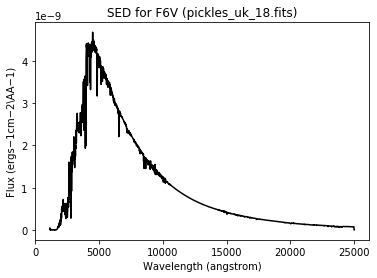

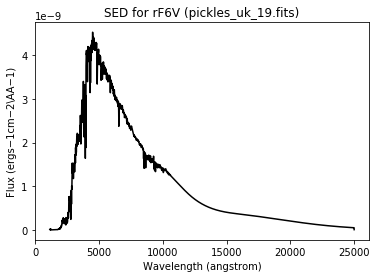

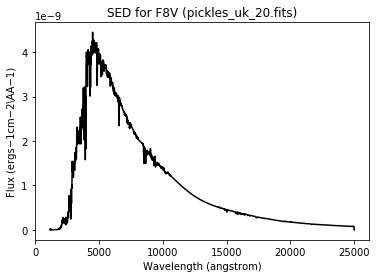

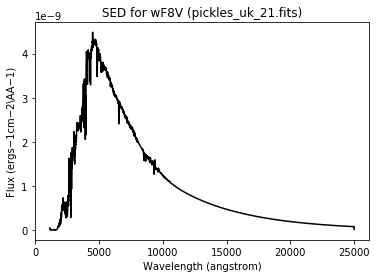

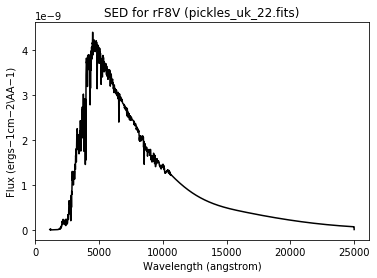

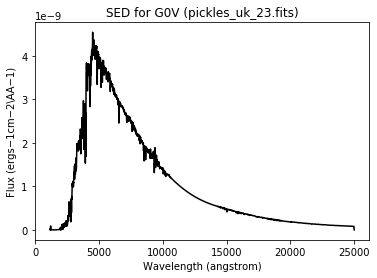

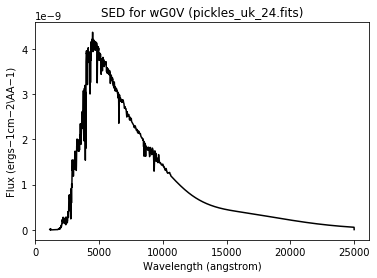

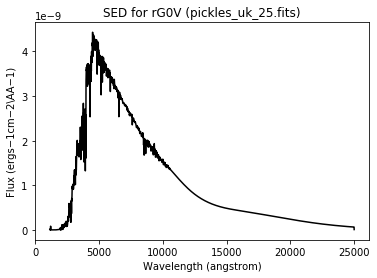

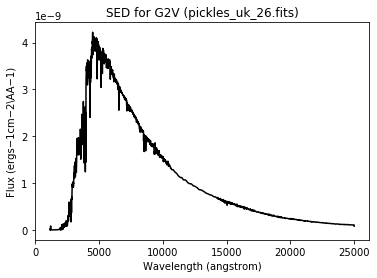

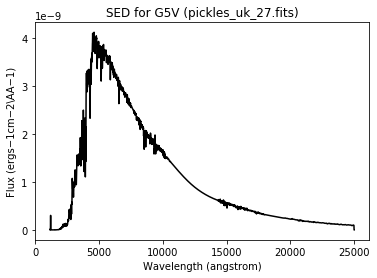

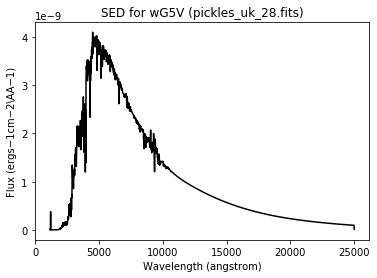

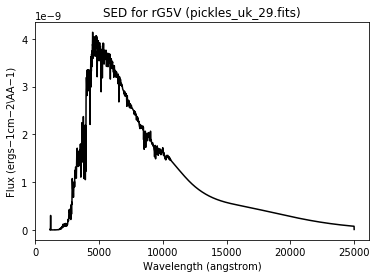

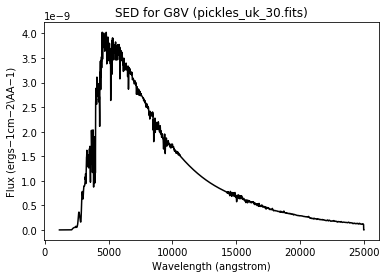

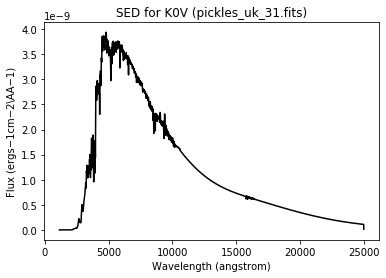

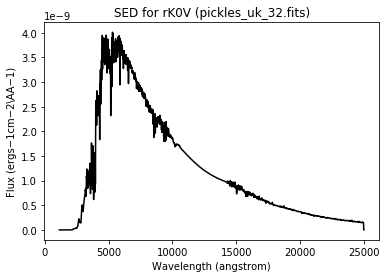

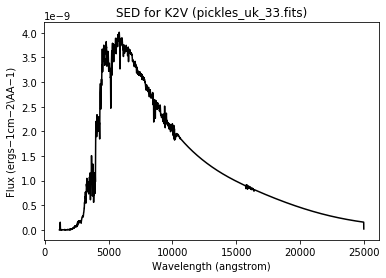

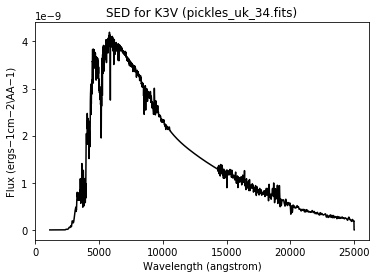

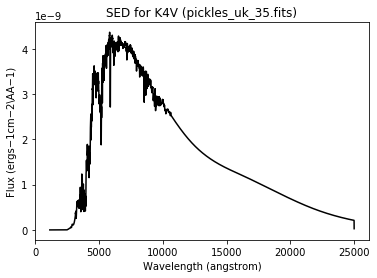

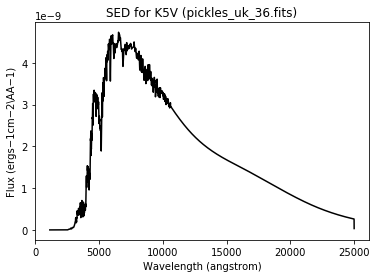

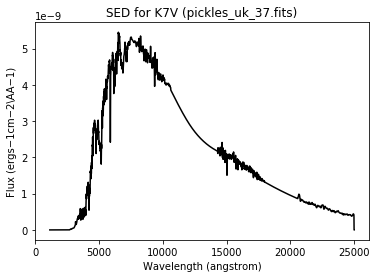

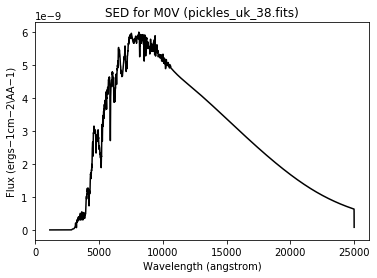

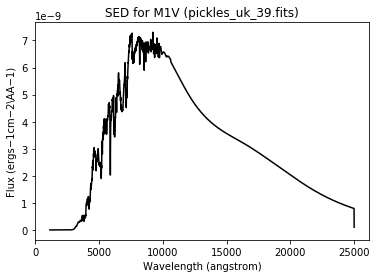

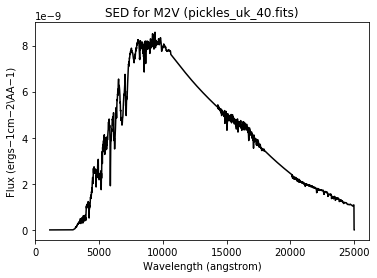

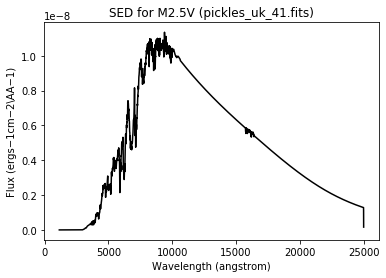

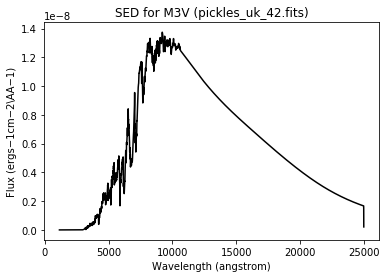

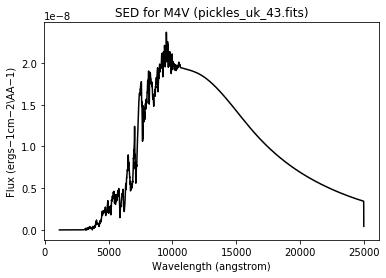

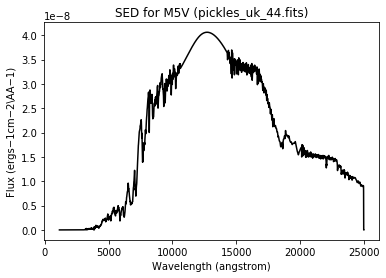

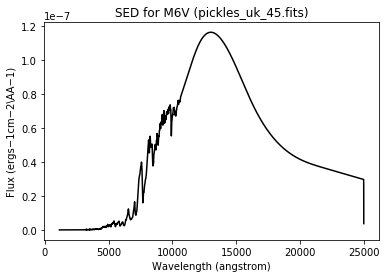

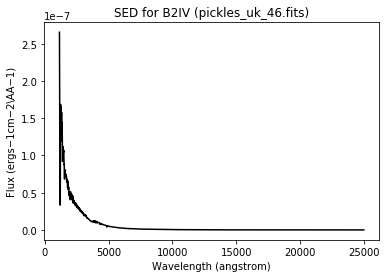

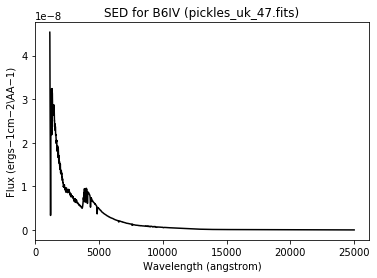

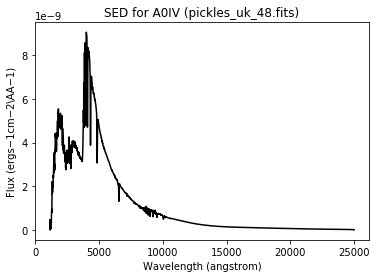

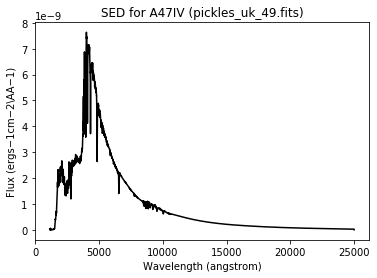

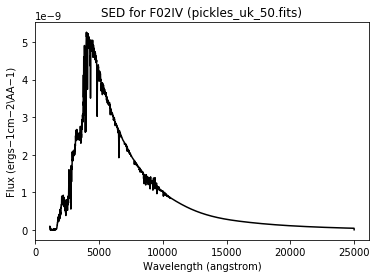

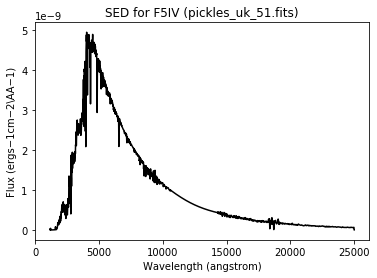

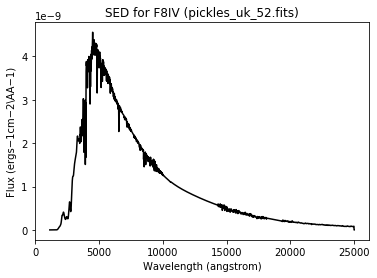

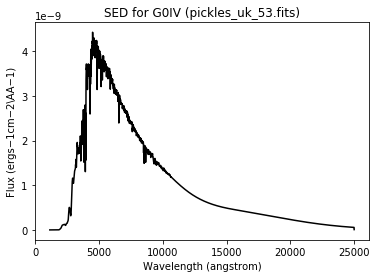

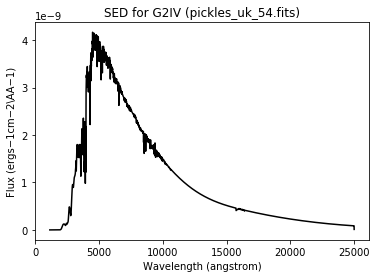

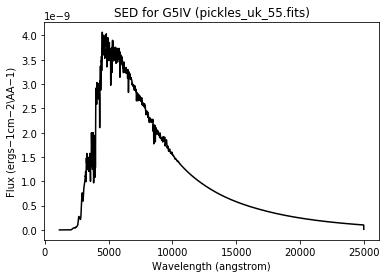

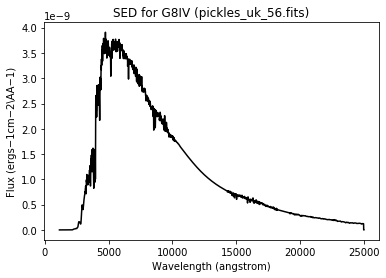

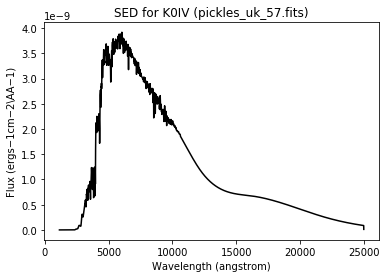

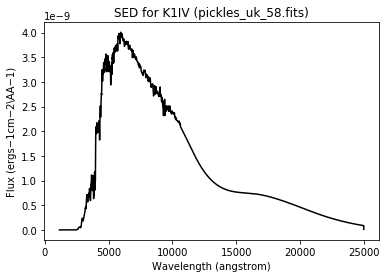

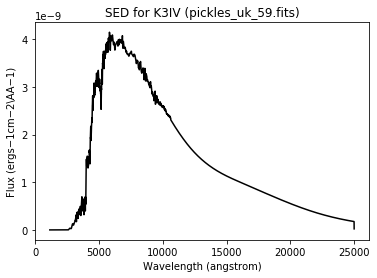

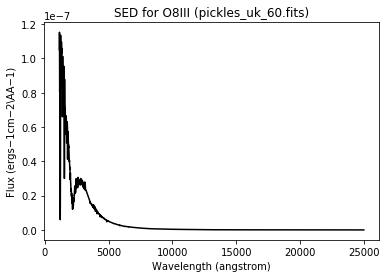

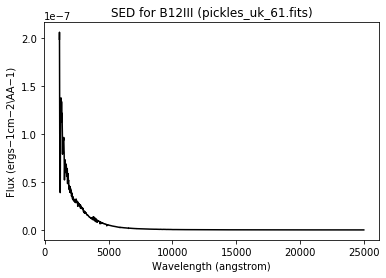

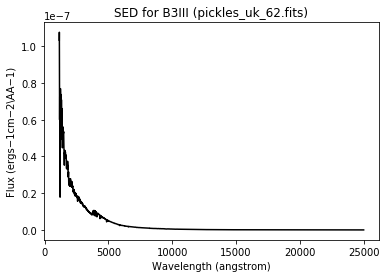

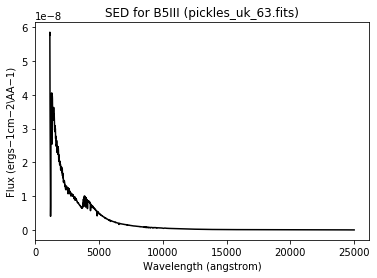

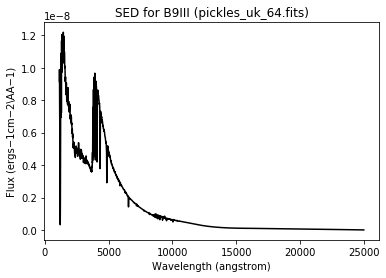

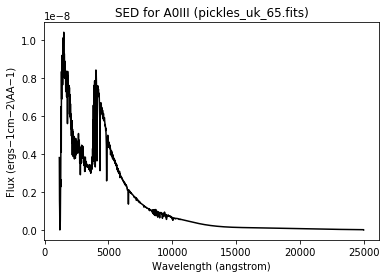

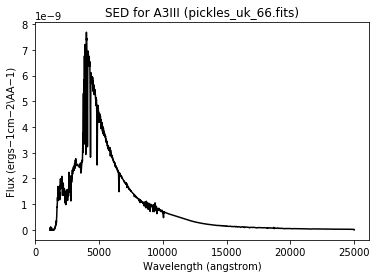

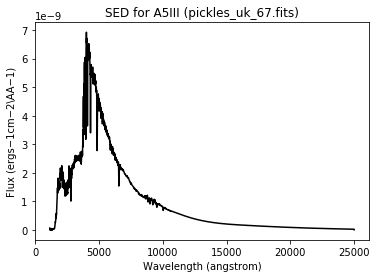

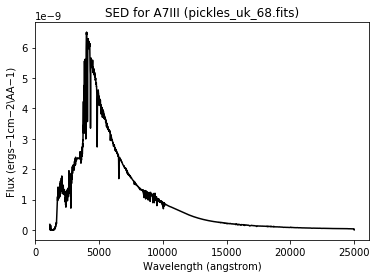

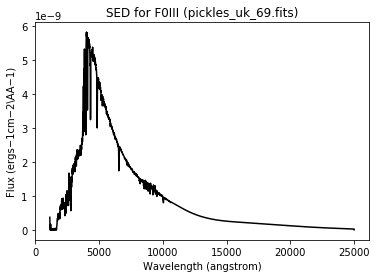

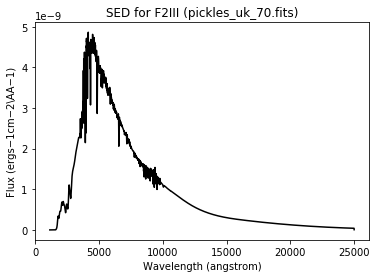

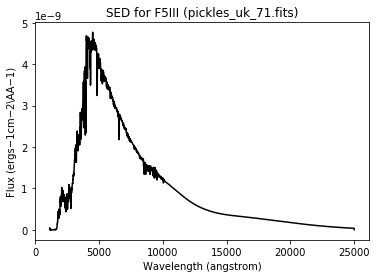

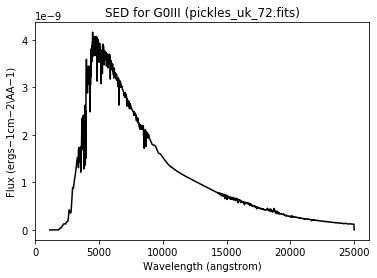

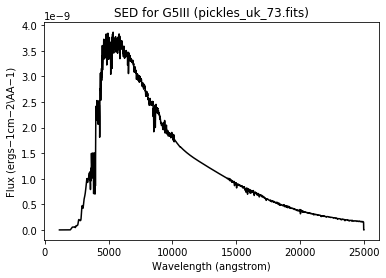

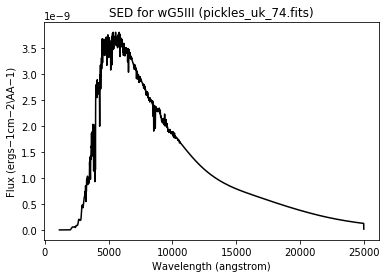

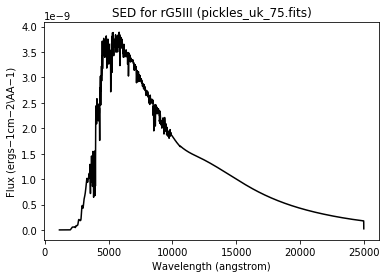

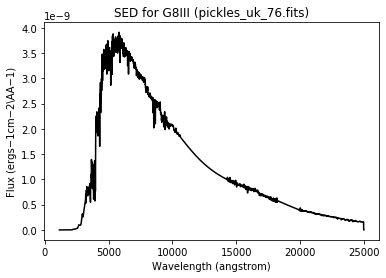

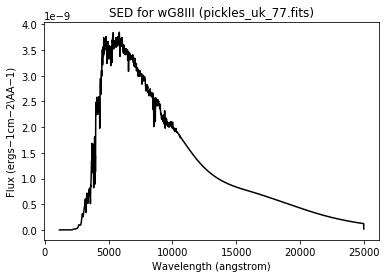

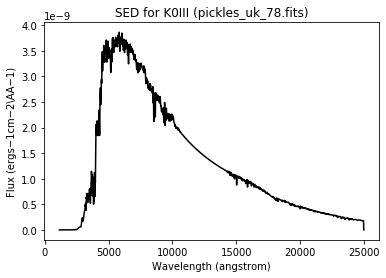

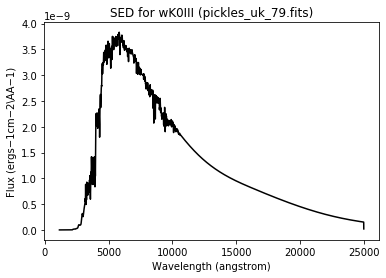

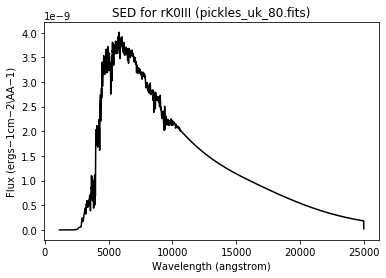

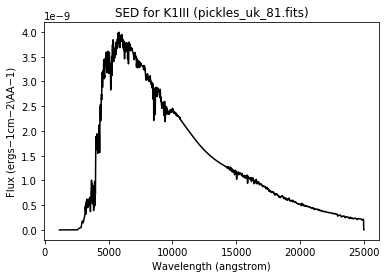

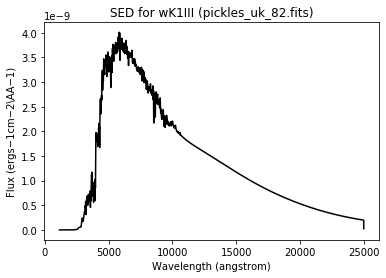

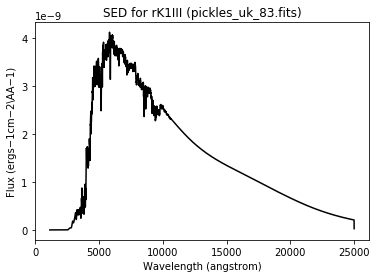

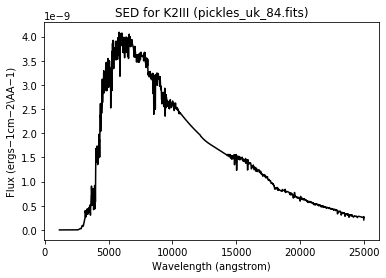

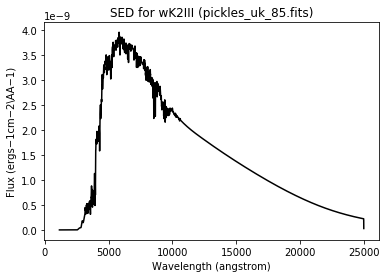

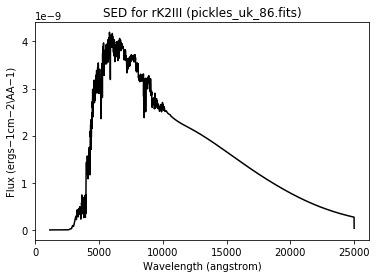

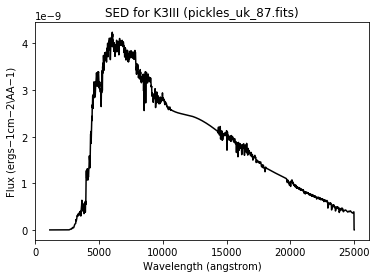

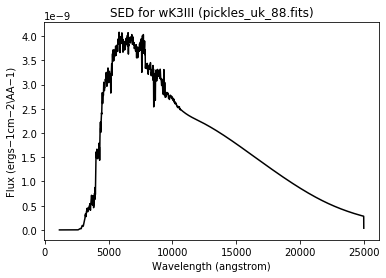

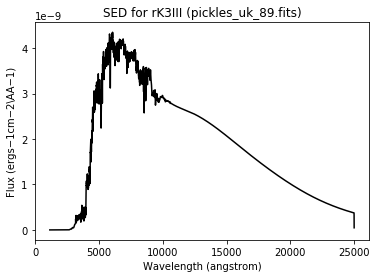

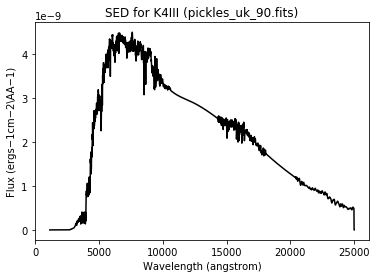

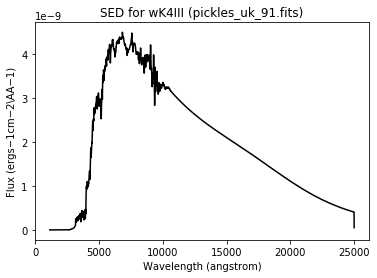

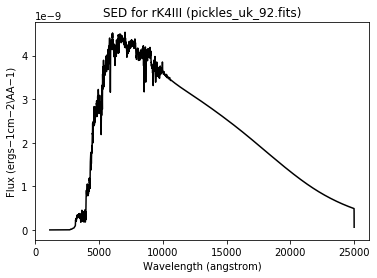

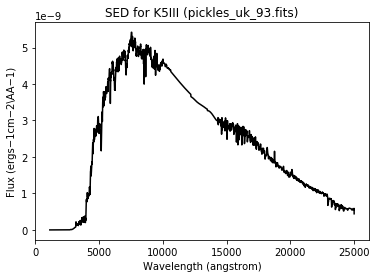

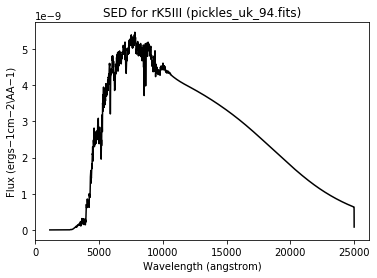

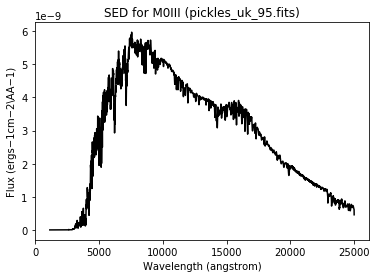

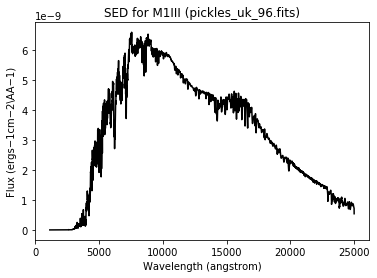

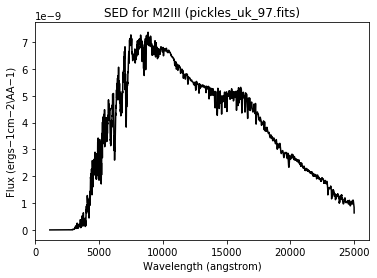

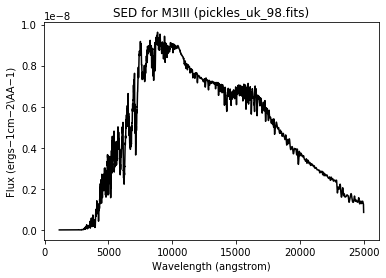

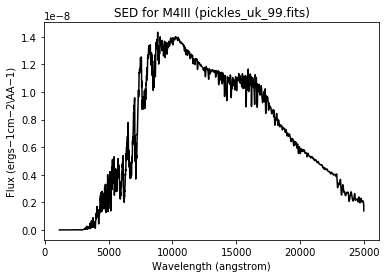

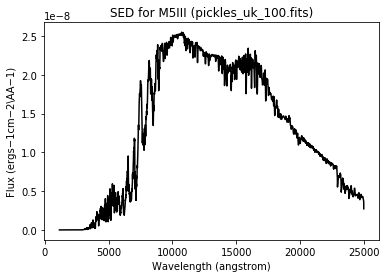

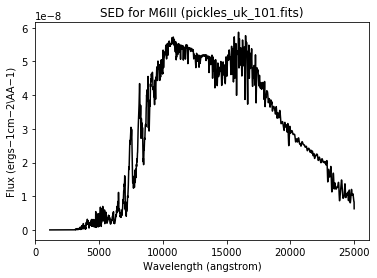

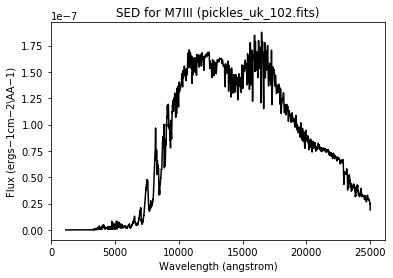

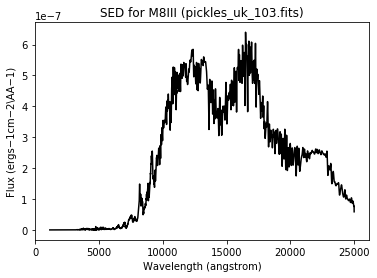

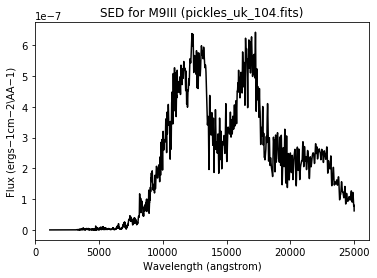

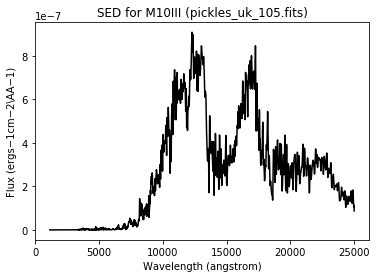

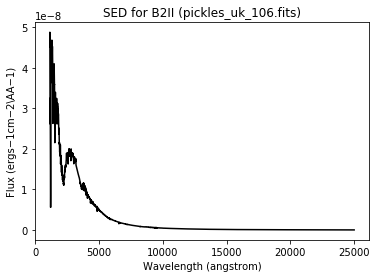

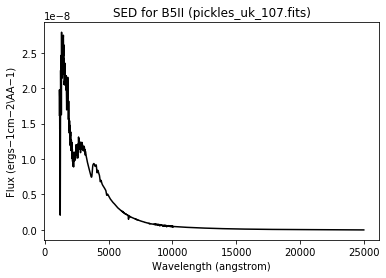

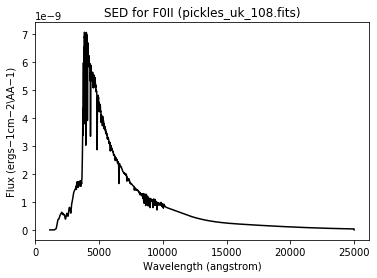

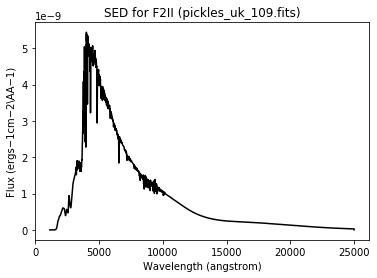

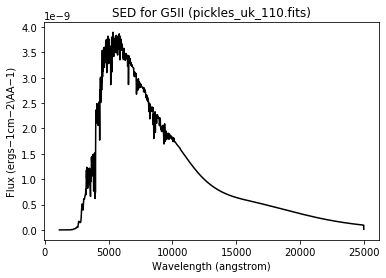

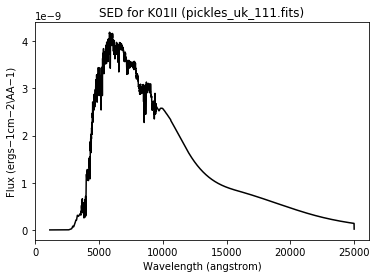

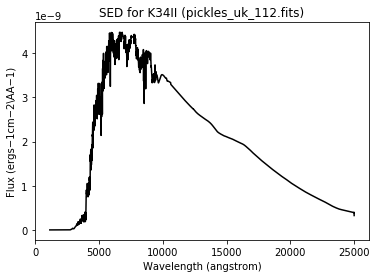

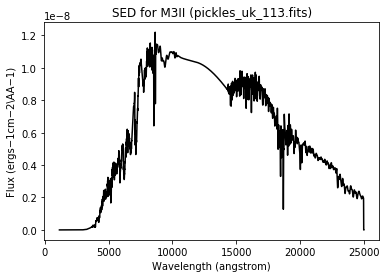

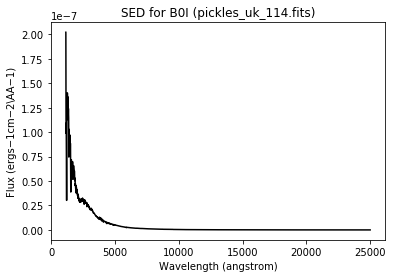

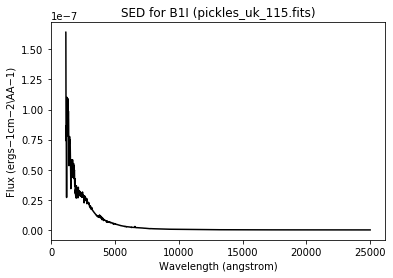

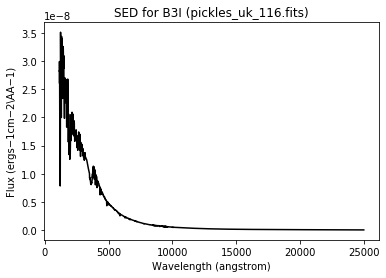

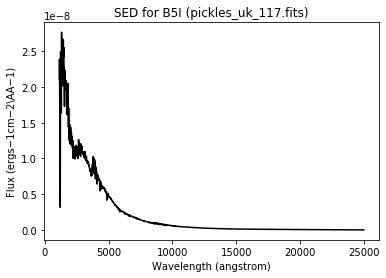

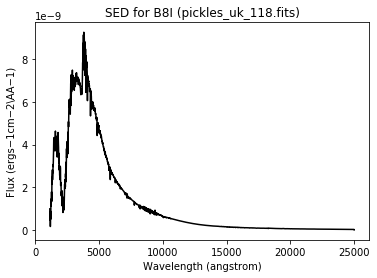

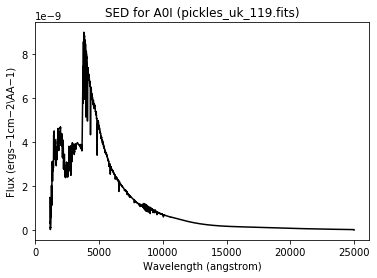

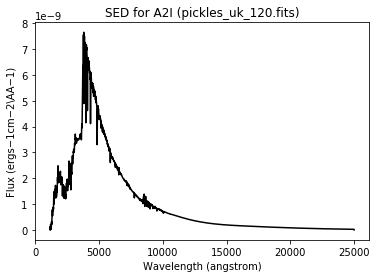

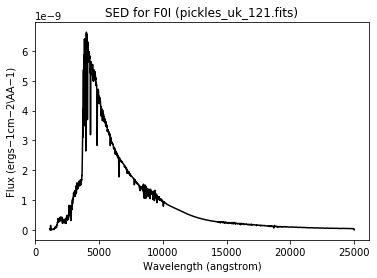

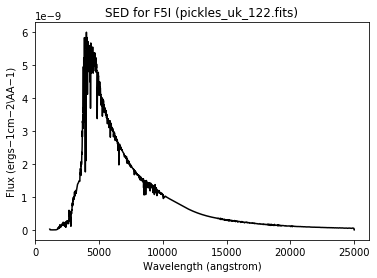

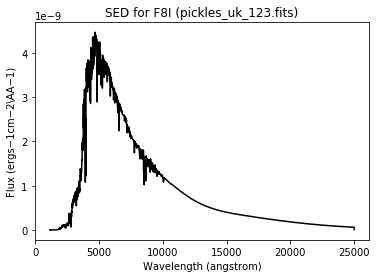

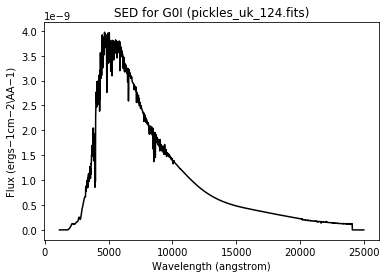

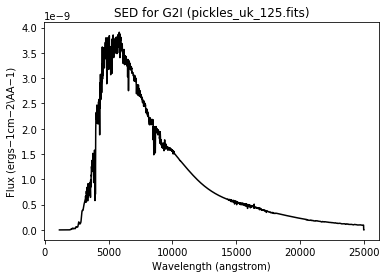

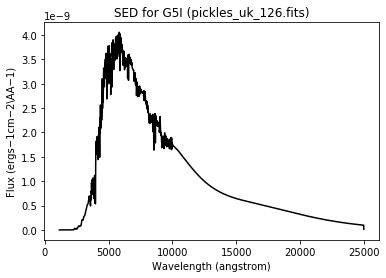

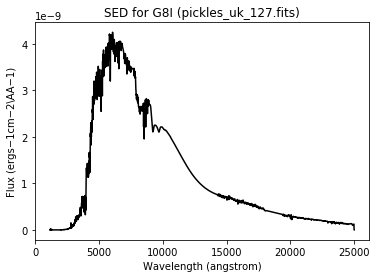

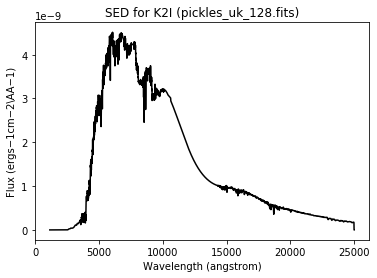

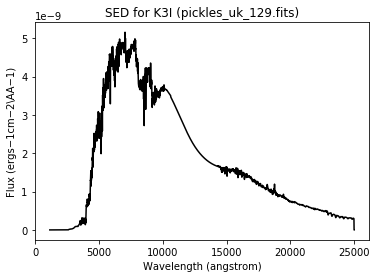

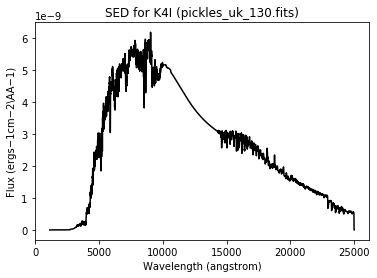

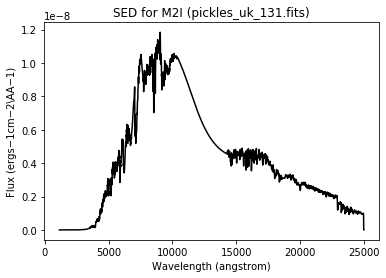

In [11]:
#SEDs for dat_uvk
for i in range(0, len(stellar_types)):
    filename = Pickles_Library2['FILENAME'][i]
    filepath = PYSYN_CDBS+'grid/pickles/dat_uvk/'+str(filename)+'.fits'
    spectype = Pickles_Library2['SPTYPE'][i]
    plt.plot(read_template(filepath).wave, read_template(filepath).flux, c='k')
    plt.title('SED for '+str(spectype)+' ('+str(filename)+'.fits)')
    plt.xlabel('Wavelength (angstrom)')
    plt.ylabel('Flux (ergs−1cm−2\AA−1)')
    #plt.savefig('SED_'+str(filename)+'.png', bbox_inches='tight', dpi=150)
    plt.show()

<font color='blue'> 
These SEDs expectedly reveal the relation between spectral class and peak wavelength (i.e. temperature). The SED for O5V peaks in UV, the SED of G0V peaks in optical, and so on. Unlike the optical and IR dominated types, spectral classes which peak in the UV tend to exhibit two peaks of similar magnitudes.

Kurucz stellar models
===========

In [12]:
# This reads the spectrum of a Kurucz atmosphere model
sp = S.Icat('k93models', Teff=10000, metallicity=0., log_g=4.0) # read Kurucz model for (Teff,[Fe/H],logg)

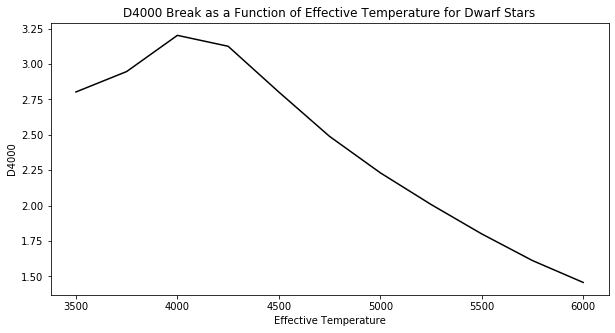

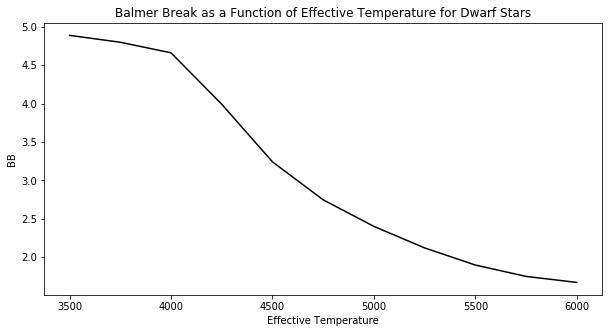

In [13]:
Teff_range = np.arange(3500,6250,step=250) #Temperature range for dwarf stars
D4000 = np.zeros((len(Teff_range))) * np.nan
BB = np.zeros((len(Teff_range))) * np.nan
for i in range(0,len(Teff_range)):
    filepath = PYSYN_CDBS + 'grid/' + 'k93models/' + 'kp00/' + 'kp00_'+str(Teff_range[i]) +'.fits'
    sp = S.Icat('k93models', Teff_range[i], 0,4)
    D4000[i] = get_D4000(sp)
    BB[i] = get_bb(sp)
    #print(Teff_range[i], D4000[i], BB[i])

plt.figure(figsize=(10,5))
plt.plot(Teff_range, D4000, c='k')
plt.title('D4000 Break as a Function of Effective Temperature for Dwarf Stars')
plt.xlabel('Effective Temperature')
plt.ylabel('D4000')
#plt.savefig('Theoretical_D4000.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(Teff_range, BB, c='k')
plt.title('Balmer Break as a Function of Effective Temperature for Dwarf Stars')
plt.xlabel('Effective Temperature')
#plt.savefig('Theoretical_BB.png', bbox_inches='tight', dpi=300)
plt.ylabel('BB')
plt.show()

<font color='blue'> 
The D4000 has a more well defined peak of intensity at lower effective temperatures, whereas the Balmer break appears to level off at lower temperatures. BB consistently remains stronger than D4000 at equal temperatures. There is a strong similarity between the theoretical plots in terms of temperature and the empirical plots in terms of spectral type, which is not unexpected. The spectral type sequence represents an ionization sequence, which in turn is an indicator for temperature. Here we see the D4000 break peaks near 4000K. According to the Kurucz readme file, the suggested model for a K5V type star is at a effective temperature of 4250K (assuming zero metallicity). Sure enough, we see that the previous D4000 figure from empirical data peaks near the K5V class.

# Bruzual-Charlot library - "D4000 vs age" analysis

In [14]:
#      Table: Characteristics of the on-line Bruzual-Charlot SEDs
#
#   File name       IMF    Lower Mass    Upper Mass       Notes 
#                         (solar mass)  (solar mass)
#
# bc95_a_XXXX   Salpeter      0.1           125       instantaneous
# bc95_b_XXXX   Salpeter      0.1            65       instantaneous 
# bc95_c_XXXX   Salpeter      0.1            30       instantaneous  
# bc95_d_XXXX   Salpeter      2.5           125       instantaneous  
# bc95_e_XXXX   Salpeter      0.1           125       burst lasting 1Gyr
# bc95_f_XXXX   Salpeter      0.1           125       exp. decreasing SFR with  e-folding time of 1Gyr
# bc95_g_XXXX   Salpeter      0.1           125       constant SFR of 1E-10 M_solar/yr
# 
# 
# ages: 10E5, 25E5, 50E5, 76E5, 10E6, 25E6, 50E6, 10E7, 50E7, 10E8, 50E8, 10E9 years

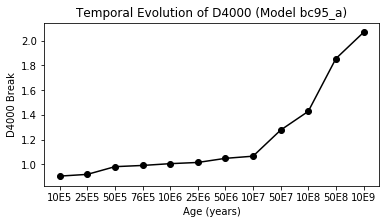

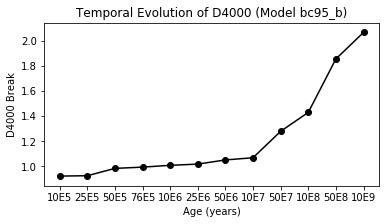

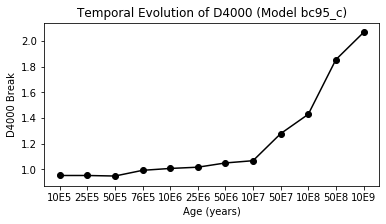

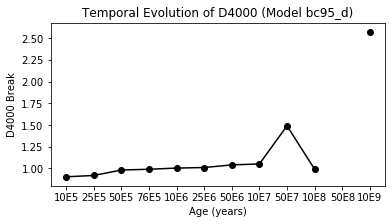

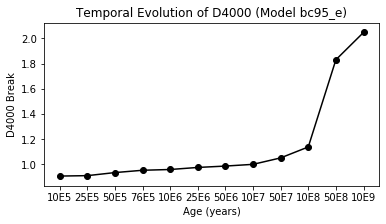

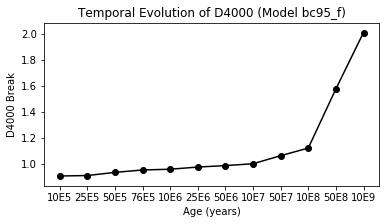

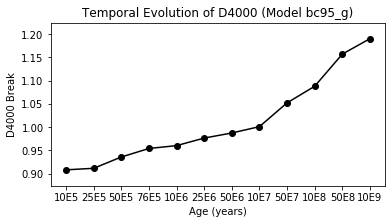

In [15]:
# ------------------------------------------------ #
# D4000 vs age  ---------------------------------- #

# see description above for the definition of each model
model_bc95 = np.array(['bc95_a', 'bc95_b', 'bc95_c', 'bc95_d', 'bc95_e', 'bc95_f', 'bc95_g'])
ages = np.array(['10E5', '25E5', '50E5', '76E5', '10E6', '25E6', '50E6', 
                 '10E7', '50E7', '10E8', '50E8', '10E9']) # years

#Plotting models separately
D4000 = np.zeros((len(ages))) * np.nan
for i in range(0,len(model_bc95)):
    for j in range(0,len(ages)):
        filename = PYSYN_CDBS+'grid/'+'bc95/'+'templates/'+str(model_bc95[i])+'_'+str(ages[j])+'.fits'
        D4000[j] = get_D4000(read_template(filename))
    plt.figure(figsize=(6,3))
    plt.scatter(ages, D4000,c='k')
    plt.plot(ages, D4000,c='k')
    plt.title('Temporal Evolution of D4000 (Model '+str(model_bc95[i])+')')
    plt.xlabel('Age (years)')
    plt.ylabel('D4000 Break')
    plt.savefig('Model_'+str(model_bc95[i])+'.png', bbox_inches='tight', dpi=300)
    plt.show()

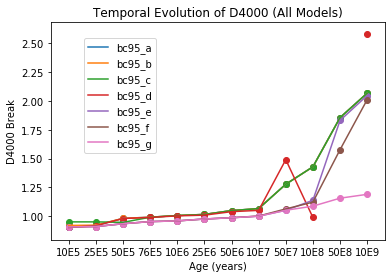

<Figure size 432x216 with 0 Axes>

In [16]:
# D4000 vs age. Plotting models together.
D4000 = np.zeros((len(ages))) * np.nan
for i in range(0,len(model_bc95)):
    for j in range(0,len(ages)):
        filename = PYSYN_CDBS+'grid/'+'bc95/'+'templates/'+str(model_bc95[i])+'_'+str(ages[j])+'.fits'
        #print(filename)
        D4000[j] = get_D4000(read_template(filename))
        #print(D4000[j])
    #print(D4000)
    plt.scatter(ages, D4000)
    plt.plot(ages,D4000, label=str(model_bc95[i]))
    plt.legend(loc=(0.1,0.4))
    plt.title('Temporal Evolution of D4000 (All Models)')
    plt.xlabel('Age (years)')
    plt.ylabel('D4000 Break')
plt.figure(figsize=(6,3))
#plt.savefig('Models.png', bbox_inches='tight', dpi=300)
plt.show()

<font color='blue'> 
All models agree on an upward trend of the strength of the D4000 break with age, but the strength of that trend varies greatly at age 10E7 and beyond. My code returns one of the D4000 values for Model D as "not an interger", which is an unfortunate error since Model D seems to be one of the more interesting cases.